In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [111]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [112]:
df1.drop(['area_type', 'availability', 'society', ], axis ='columns', inplace = True)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [113]:
df1.isnull()

,location,size,total_sqft,bath,balcony,price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
13315,False,False,False,False,False,False
13316,False,False,False,False,True,False
13317,False,False,False,False,False,False
13318,False,False,False,False,False,False


In [114]:
df1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        location   size  total_sqft   bath  balcony  price
0         False  False       False  False    False  False
1         False  False       False  False    False  False
2         False  False       False  False    False  False
3         False  False       False  False    False  False
4         False  False       False  False    False  False
...         ...    ...         ...    ...      ...    ...
13315     False  False       False  False    False  False
13316     False  False       False  False     True  False
13317     False  False       False  False    False  False
13318     False  False       False  False    False  False
13319     False  False       False  False    False  False

[13320 rows x 6 columns]>

In [115]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [116]:
median_balcony = df1['balcony'].median()
median_balcony

2.0

In [117]:
df1['balcony'].fillna(median_balcony, inplace = True)

In [118]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [119]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [120]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [121]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

C:\Users\udain\AppData\Local\Temp\ipykernel_1356\1989152296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [122]:
def is_float(x):
    try :
        float(x)   
    except:
        return False
    return True

In [123]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,2.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4


In [124]:
def convt_to_sqft(x):
    ls = x.split('-')
    if len(ls) ==2:
        mean = (float(ls[0])+float(ls[1]))/2
        return float(mean) 
    try :
        float(x)
        return float(x)
    except:
        return None

In [125]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convt_to_sqft)

In [126]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [127]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [128]:
df3['total_sqft'].isnull().sum()

46

In [129]:
df3.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [130]:
df3 = df3[df3.total_sqft.notnull()]
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [131]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [132]:
df4['location'] = df4['location'].apply(lambda x: x.strip())
location_stats = df4['location'].value_counts()
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [133]:
len(location_stats[location_stats>10])

240

In [134]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [135]:
df4['location'] = df4['location'].apply(lambda x: 'others' if x in location_stats_less_than_10 else x)
location_stats = df4['location'].value_counts()
location_stats

others             2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

In [136]:
df4[df4['total_sqft']/df4['bhk']<300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,others,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,others,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [137]:
df5 = df4[~(df4['total_sqft']/df4['bhk']<300)]
df5.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3,3888.888889


In [138]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby(['location']):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>=(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df])
    return df_out
df6 = remove_pps_outliers(df5)
df6

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
210,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.00,4,15017.543860
848,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.00,3,11901.840491
2152,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.00,3,12533.333333
7138,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.00,3,10833.333333
7358,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...,...
13285,others,2 BHK,1353.0,2.0,2.0,110.00,2,8130.081301
13291,others,1 Bedroom,812.0,1.0,0.0,26.00,1,3201.970443
13292,others,3 BHK,1440.0,2.0,2.0,63.93,3,4439.583333
13302,others,2 BHK,1075.0,2.0,2.0,48.00,2,4465.116279


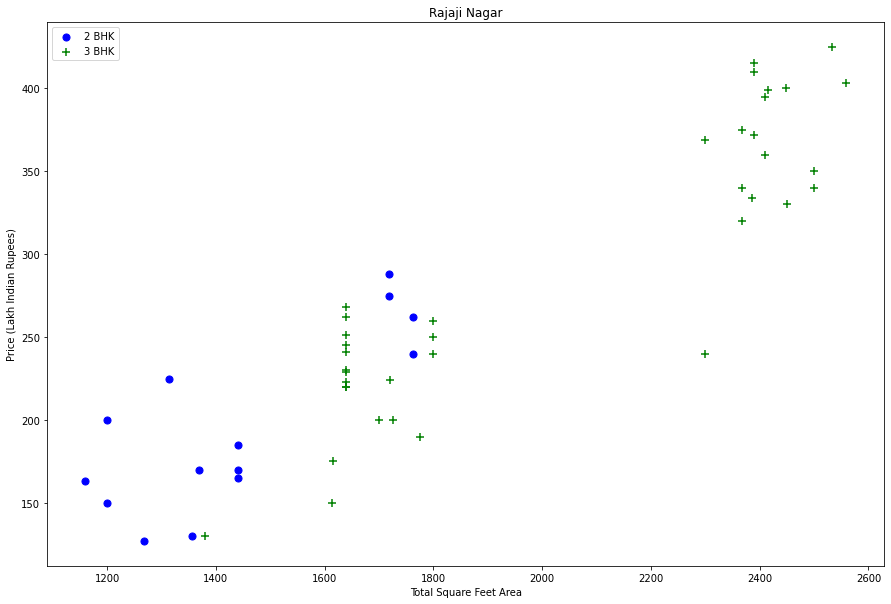

In [139]:
def plot_scatter_loc(df, loc):
    bhk2 = df[(df.location == loc) & (df.bhk == 2)]
    bhk3 = df[(df.location == loc) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(loc)
    plt.legend()

plot_scatter_loc(df6, 'Rajaji Nagar')

In [140]:
def remove_bhk_outliers(df) :
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location') :
        bhk_stats ={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk') :
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[(bhk_df.price_per_sqft<stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df7 = remove_bhk_outliers(df6)

df7.shape

(7317, 8)

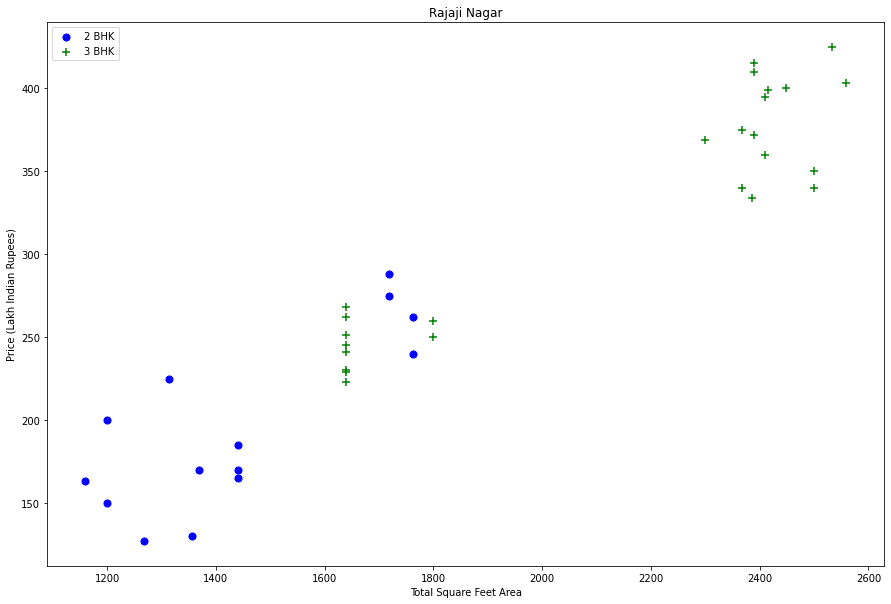

In [141]:
plot_scatter_loc(df7,"Rajaji Nagar")


Text(0, 0.5, 'Count')

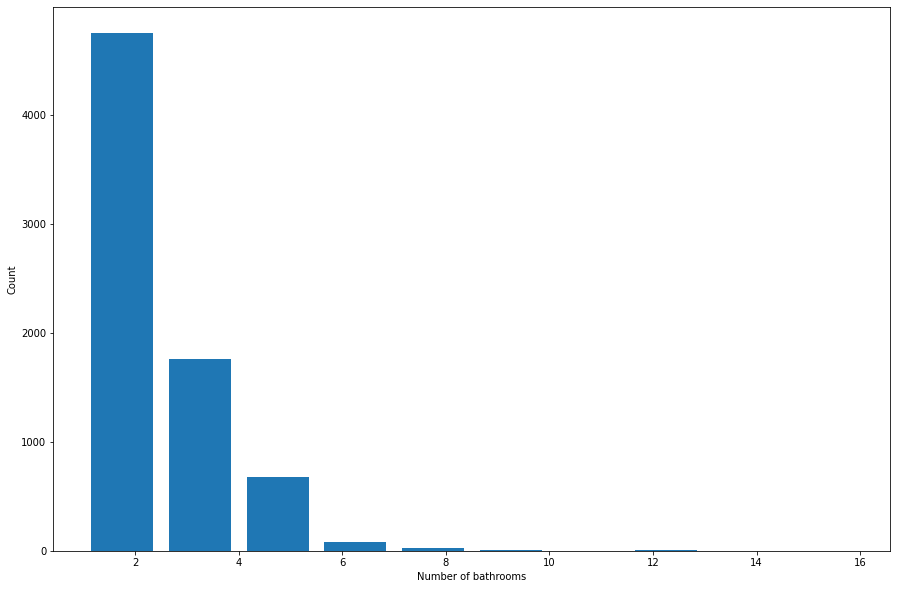

In [142]:
plt.hist(df7.bath, rwidth =0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [143]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [144]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
11366,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
12103,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
2620,others,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [145]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7239, 8)

Text(0, 0.5, 'Count')

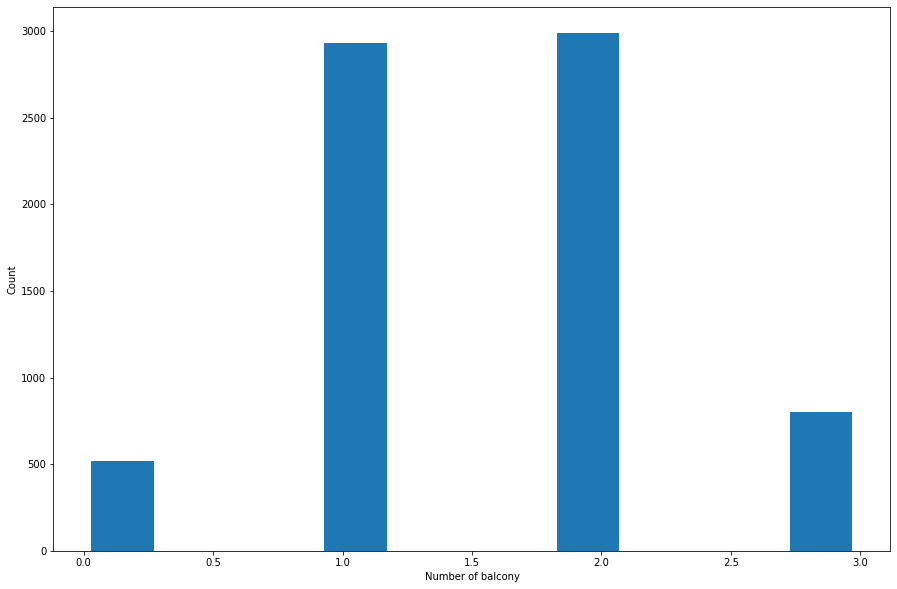

In [146]:
plt.hist(df8.balcony, rwidth = 0.8)
plt.xlabel('Number of balcony')
plt.ylabel('Count')

In [147]:
df8['balcony'].unique()

array([1., 2., 3., 0.])

In [148]:
df8[df8['balcony']>df8['bhk']+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft


In [149]:
df9 = df8.drop(['size','price_per_sqft'], axis = 'columns')
df9.head()

,location,total_sqft,bath,balcony,price,bhk
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [150]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
210,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
df10 = pd.concat([df9, dummies.drop(['others'], axis ='columns')], axis='columns')
df10.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df11 = df10.drop('location', axis = 'columns')
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
X= df11.drop(['price'], axis ='columns')
y=df11.price

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [155]:
def find_best_model_using_gridsearchCV(X,y):
    algos ={
        'linear reg' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    CV = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = CV, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchCV(X,y)

C:\Users\udain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\udain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous be

C:\Users\udain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\udain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\udain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear reg,0.847813,{'normalize': False}
1,lasso,0.726894,"{'alpha': 2, 'selection': 'random'}"
2,decision tree,0.730066,"{'criterion': 'mse', 'splitter': 'random'}"


In [156]:
clf = LinearRegression()
clf.fit(X,y)

LinearRegression()

In [157]:
def predict_price(location, bhk,balcony, bath,sqft) :
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >=0:
        x[loc_index] = 1
        
    return clf.predict([x])[0]
        

In [159]:
predict_price('1st Phase JP Nagar',2, 1,2, 1000)

C:\Users\udain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.15422759918755

In [161]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(clf,f)

In [162]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))